# Read Data

#Training data: train1.csv  1000 rows and 2 columns, 1st column: feature , 2nd column: label

#Testing data: test1.csv    200 rows and 2 columns, 1st column: feature , 2nd column: label


In [1]:
from numpy import genfromtxt
import numpy as np
import pylab as p

# read data from csv
def read_csv(trainPath,testPath):
    my_data_train = genfromtxt(trainPath, delimiter=',')  #reading data from csv file
    my_data_test = genfromtxt(testPath, delimiter=',')

    my_data_train1=my_data_train[1:]   #first row contains names, so drop it
    my_data_test1=my_data_test[1:]
    x1,y1=np.transpose(my_data_train1)
    x2,y2=np.transpose(my_data_test1)
    return x1,y1,x2,y2

# Data Visualization
Represent data graphically

plot graph of feature vs label

In [2]:
#Plot the graph of training data and testing data
def plot(x1,y1,x2,y2):
    fig,(ax1,ax2)=p.subplots(1,2)               
    ax1.plot(x1,y1,'o')
    ax1.set_title('Train  Data')
    ax1.set_xlabel('Feature')
    ax1.set_ylabel('Label')

    #Plot the graph of testing data
    ax2.plot(x2,y2,'o')
    ax2.set_title('Test Data')
    ax2.set_xlabel('Feature')
    ax2.set_ylabel('Label')

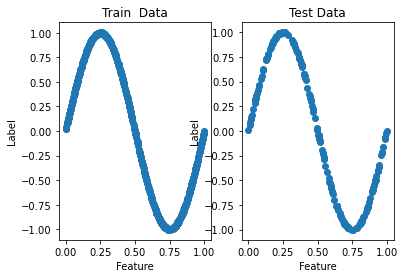

In [3]:
x1,y1,x2,y2=read_csv('train1.csv','test1.csv')
plot(x1,y1,x2,y2)

# Linear Regression

**It is a process of finding linear relationship  between input (features) and output (continuous) that is a best fit of observed data.**   
**Its aim is to learn a curve that fits the data well.**

**Hypothesis:**   
    $ h(w)=w_0+w_1x_1$               (Univariate: Involves single variable(feature))          
    $h(w)=w_0+w_1x_1+w_2x_2+w_3x_3...$     (Multivariate: Involves multiple variables(features))



# **Linear**

# Train the model

#### Validation

As we don't know which order polynomial fits the data better, train the models with polynomials of different order and choose the one which fits the data better (which has less training and testing errors)

Write a code to fit a curve that minimizes squared error cost function using gradient descent (with learning rate 0.05).
Hypothesis:  y = W_T * Φ (x)
W ∈ R
W: Parameters to be learned

Squared error:    
$J(W)=\dfrac{1}{2m}\sum{(W^T*\phi(x))-y}$


n: order of polynomial
Vary n from 1 to 9 i.e fit 9 different curves (polynomials of degree 1, 2, …, 9) to the training data, and estimate the
parameters(W). Estimated W is used to predict labels on test data and measure squared error on the test set

In [4]:
def train(x1,y1,iterations=100000):
    m=len(x1)
    all_x=np.zeros([m,10])
    for k in range(m):
        for n in range(0,10):
            all_x[k][n]=pow(x1[k],n)
    #np.shape(all_x)    all_w=np.ones(10)
    #for i in range(1,10):
    alpha=0.05
    poly_w=[]
    all_h=[]
    err_tr=[]
    for i in range(1,10):
        w=np.ones(i+1)
        x=all_x[:,:i+1]
        for l in range(0,iterations):
            h=np.dot(x,w)
      #error=predicted output - original output
            e=h-y1

            for j in range(0,i+1):
                w[j]=w[j]-((alpha/m)*np.sum(e*x[:,j]))
        mse=(1/(2*m))*np.sum(np.power(e,2))
        err_tr.append(mse)
        print('e in i=',i,'is',mse)
        poly_w.append(w)
        all_h.append(h)
    
    return poly_w,all_h,err_tr
   

# Test the model

In [5]:
#Use Predicted W on test data
def test(x2,y2,poly_w):
    m=len(x2)
    all_x=np.zeros([m,10])
    for i in range(m):
        for j in range(0,10):
            all_x[i][j]=pow(x2[i],j)   # find all degrees of x (x^0,x^1,x^2...x^9)


    test_error=[]
    all_h=[]
    
    for i in range(1,10):
        w=poly_w[i-1]
        x=all_x[:,:i+1]
        h=np.dot(x,w)
        all_h.append(h)
        e=h-y2
        mse=(1/(2*m))*np.sum(np.power(e,2))
        test_error.append(mse)
        print('error of order',i,'is',mse)

    return all_h,test_error

In [6]:
poly_w,all_hTrain,train_error=train(x1,y1)

e in i= 1 is 0.09967909712461073
e in i= 2 is 0.0991026253852972
e in i= 3 is 0.037125679982557815
e in i= 4 is 0.008325867437784988
e in i= 5 is 0.009014274708560014
e in i= 6 is 0.012470571371842857
e in i= 7 is 0.013603005723880025
e in i= 8 is 0.012348509079064865
e in i= 9 is 0.00984700579862625


In [7]:
all_hTest,test_err=test(x2,y2,poly_w)

error of order 1 is 0.09556384015648908
error of order 2 is 0.09606879564717251
error of order 3 is 0.03681126768838975
error of order 4 is 0.00859049357335131
error of order 5 is 0.009277210436429721
error of order 6 is 0.012901005446906783
error of order 7 is 0.014142509482273531
error of order 8 is 0.012864491837017869
error of order 9 is 0.010256566902152304


#  Visualization of the fitted Curves

#  plots of all 9 different curves fitted on training data

In [8]:
def plotcurves(x1,all_h,title):
    for i in range(1,10):
        h=all_h[i-1]
        fig,ax=p.subplots()
        ax.plot(x1,h,'o')
        ax.set_title(title)
        ax.set_xlabel('Feature')
        ax.set_ylabel('Label')

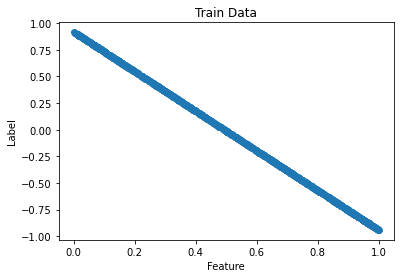

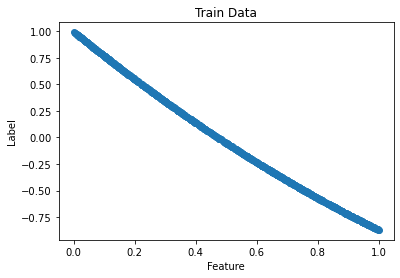

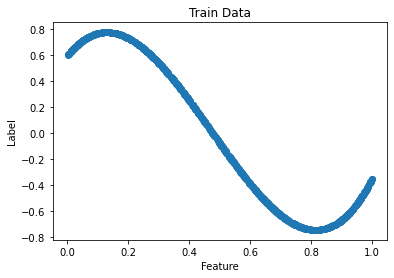

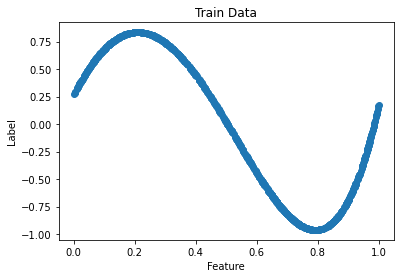

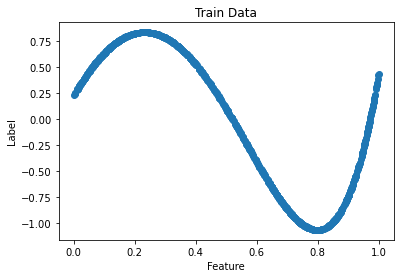

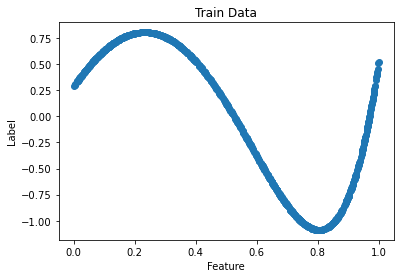

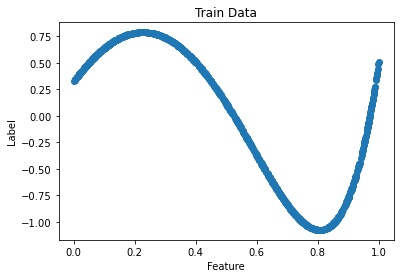

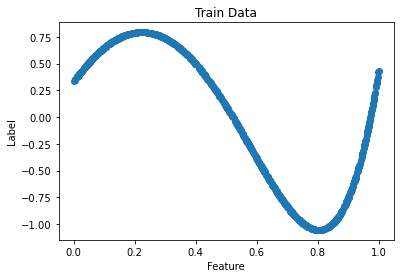

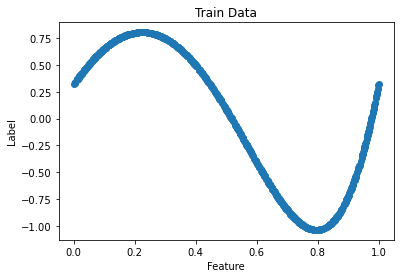

In [9]:
plotcurves(x1,all_hTrain,'Train Data')

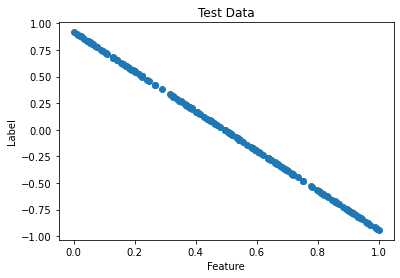

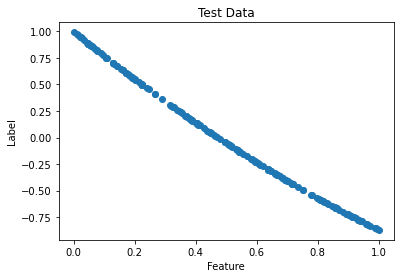

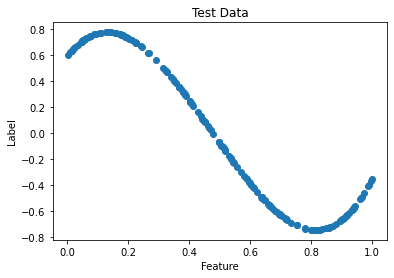

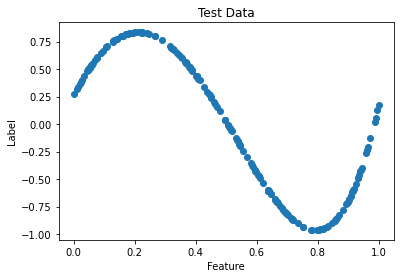

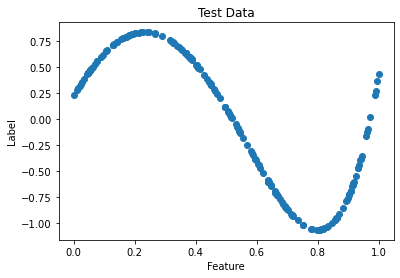

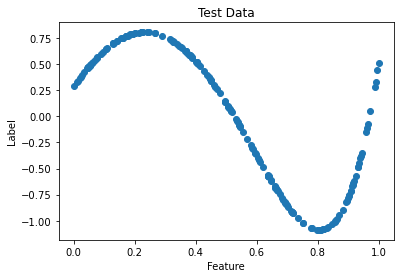

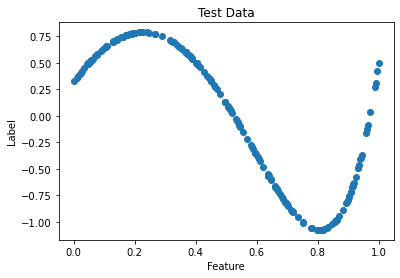

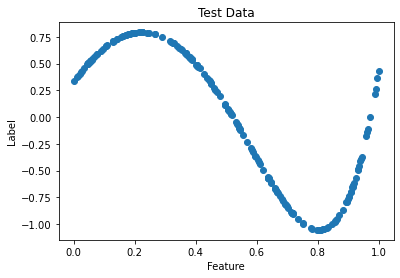

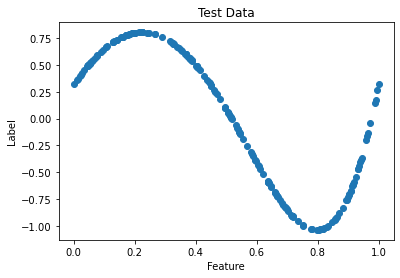

In [10]:
plotcurves(x2,all_hTest,'Test Data')

# Squared error on both train and test data

In [11]:
def error_plot(train_error,test_error):
    degree=np.arange(1,10)
    fig,ax=p.subplots()

    ax.plot(degree,train_error,'o-',label='Training error')
    ax.legend()
    ax.plot(degree,test_error,'o-',label='Testing error')
    ax.legend()
    ax.set_title('Error plot')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Error')

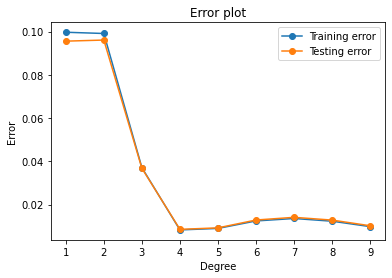

In [12]:
error_plot(train_error,test_err)

# Regularization

Regulariztion tunes the hypothesis by adding an additional penalty term in the cost function.

The additional penalty term controls the hypothesis such that the coefficients don't take extreme values.

It is used to address overfitting. It keeps all features but reduces magnitude of parameters.

# Overfitting:

It refers to a model that models the training data too well, taking up random fluctuations (noise) in the training data as concepts.

It fits training data well but fails to generalize for unknown data.

Testing error: less
Training error: more


# a) Lasso Regression

**Adds absolute of coeffiecient values as penalty term.**  

<img src="https://render.githubusercontent.com/render/math?math=J(w)=\dfrac{1}{2m}\sum_{i=1}^{m}y^{(i)}log(h(x^{(i)}))%2B(1-y^{(i)})log(1-h(x^{(i)})">  

                m: no. of training examples

In [13]:
def train_lasso(x1,y1,iterations=100):
    m=len(x1)
    all_x=np.zeros([m,10])
    for k in range(m):
        for n in range(0,10):
            all_x[k][n]=pow(x1[k],n)
    #np.shape(all_x)    all_w=np.ones(10)
    #for i in range(1,10):
    alpha=0.05
    poly_w=[]
    all_h=[]
    err_tr=[]
    la=0.25  #regularization parameter 
    for i in range(1,10):
        w=np.ones(i+1)
        x=all_x[:,:i+1]
        for l in range(0,iterations):
            h=np.dot(x,w)
      #error=predicted output - original output
            e=h-y1
            
            #update w values simultaneously
            w[0]=w[0]-((alpha/m)*np.sum(e)) #update w0 seperately (should not use regularization for w0), x0=1
            for j in range(1,i+1):
                w[j]=w[j]-(alpha*la/(2*m))-((alpha/m)*np.sum(e*x[:,j])) #update w0 seperately (should not use regularization for w0)
    
        
        wl=w[1:]     #summation from w=1
        mse=(1/(2*m))*(np.sum(np.power(e,2))+(la*np.sum(wl)))
        
        err_tr.append(mse)
        print('e in i=',i,'is',mse)
        poly_w.append(w)
        all_h.append(h)
    
    return poly_w,all_h,err_tr

In [14]:
#Use Predicted W on test data
def testLasso(x2,y2,poly_w):
    m=len(x2)
    all_x=np.zeros([m,10])
    for i in range(m):
        for j in range(0,10):
            all_x[i][j]=pow(x2[i],j)   # find all degrees of x (x^0,x^1,x^2...x^9)


    test_error=[]
    all_h=[]
    la=0.25
    for i in range(1,10):
        w=poly_w[i-1]
        x=all_x[:,:i+1]
        h=np.dot(x,w)
        all_h.append(h)
        e=h-y2
        mse=(1/(2*m))*(np.sum(np.power(e,2))+(la*np.sum(w[1:])))
        test_error.append(mse)
        print('error of order',i,'is',mse)

    return all_h,test_error

Training
e in i= 1 is 0.20452371949829226
e in i= 2 is 0.1796935902395874
e in i= 3 is 0.16907380178470435
e in i= 4 is 0.1625315365893826
e in i= 5 is 0.1562555026547543
e in i= 6 is 0.14937656001211963
e in i= 7 is 0.1420225274855955
e in i= 8 is 0.1345468319180707
e in i= 9 is 0.12727362858308497
Testing
error of order 1 is 0.18817662342753597
error of order 2 is 0.16547733968373873
error of order 3 is 0.15572016112720222
error of order 4 is 0.1497414908007093
error of order 5 is 0.14407517300658665
error of order 6 is 0.13792482275307152
error of order 7 is 0.1313919757414117
error of order 8 is 0.12477976518790422
error of order 9 is 0.11836737025680619


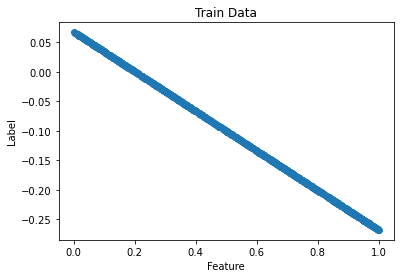

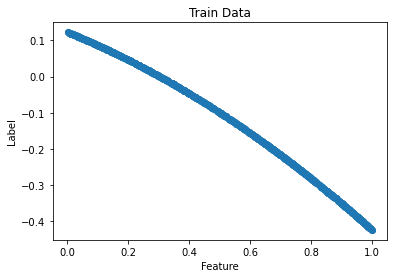

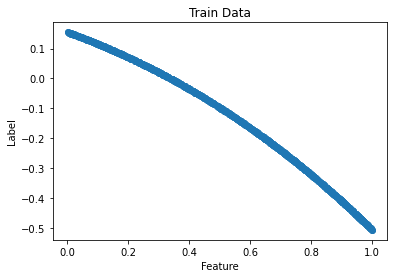

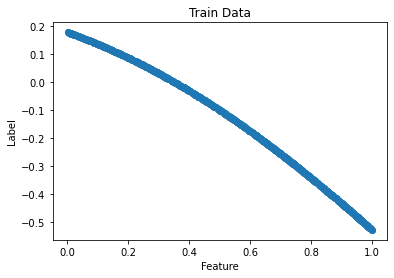

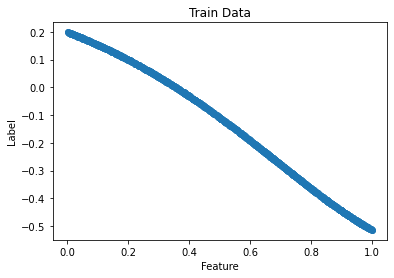

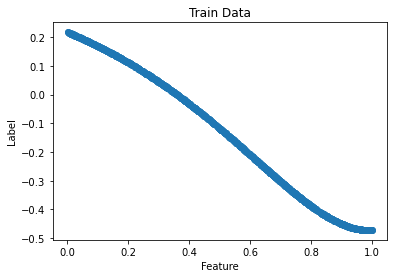

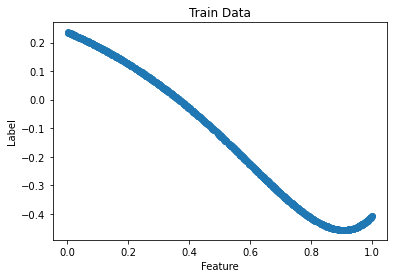

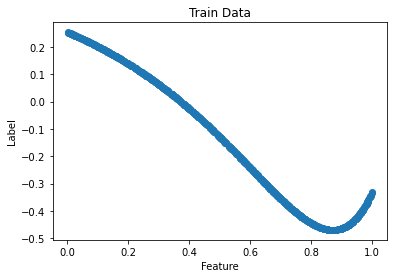

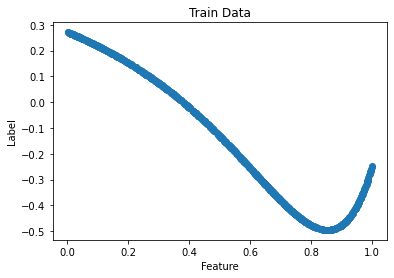

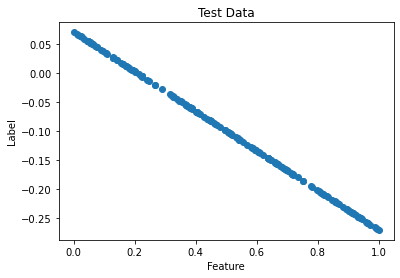

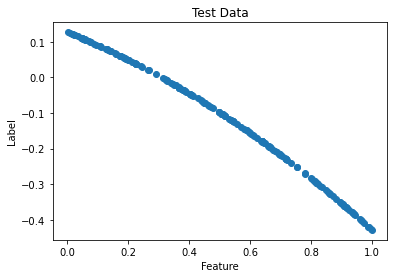

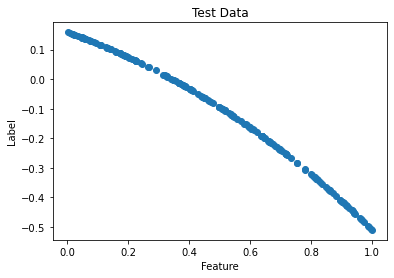

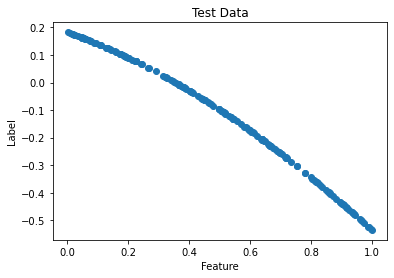

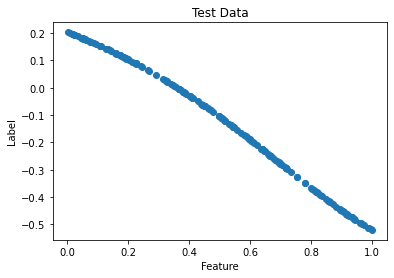

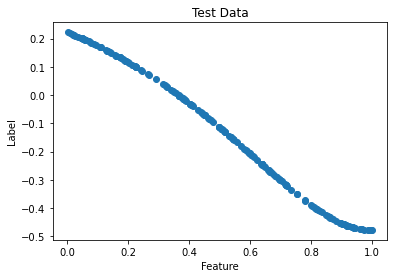

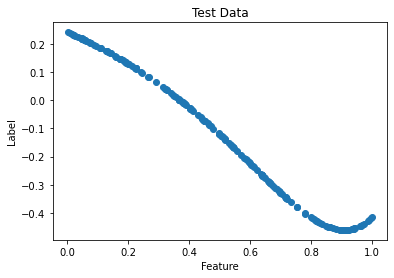

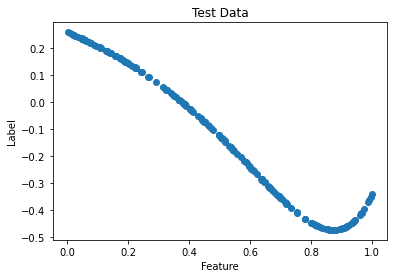

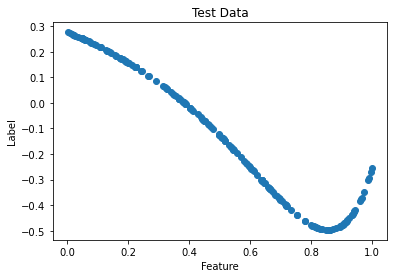

In [15]:
print("Training")
poly_wr,all_hr,train_errR=train_lasso(x1,y1)
print("Testing")
all_hrTest,testr_err=testLasso(x2,y2,poly_wr)
plotcurves(x1,all_hr,'Train Data')
plotcurves(x2,all_hrTest,'Test Data')

# Ridge Regression

In [16]:
def trainRidge(x1,y1,iterations=100):
    m=len(x1)
    all_x=np.zeros([m,10])
    for k in range(m):
        for n in range(0,10):
            all_x[k][n]=pow(x1[k],n)
    #np.shape(all_x)    all_w=np.ones(10)
    #for i in range(1,10):
    alpha=0.05
    poly_w=[]
    all_h=[]
    err_tr=[]
    la=0.25  #regularization parameter 
    for i in range(1,10):
        w=np.ones(i+1)
        x=all_x[:,:i+1]
        for l in range(0,iterations):
            h=np.dot(x,w)
      #error=predicted output - original output
            e=h-y1
        
            #update w values simultaneously
            w[0]=w[0]-((alpha/m)*np.sum(e)) #update w0 seperately (should not use regularization for w0), x0=1
            for j in range(1,i+1):
                w[j]=w[j]*(1-(alpha*la/m))-((alpha/m)*np.sum(e*x[:,j])) #update w0 seperately (should not use regularization for w0)
    
        wl=w[1:]     #summation from w=1
        mse=(1/(2*m))*np.sum(np.power(e,2))+(la*np.sum(np.power(wl,2))/(2*m))
        
        err_tr.append(mse)
        print('e in i=',i,'is',mse)
        poly_w.append(w)
        all_h.append(h)
    
    return poly_w,all_h,err_tr

In [17]:
#Use Predicted W on test data
def testRidge(x2,y2,poly_w):
    m=len(x2)
    all_x=np.zeros([m,10])
    for i in range(m):
        for j in range(0,10):
            all_x[i][j]=pow(x2[i],j)   # find all degrees of x (x^0,x^1,x^2...x^9)

    la=0.25
    test_error=[]
    all_h=[]
    
    for i in range(1,10):
        w=poly_w[i-1]
        x=all_x[:,:i+1]
        h=np.dot(x,w)
        all_h.append(h)
        e=h-y2
        wl=w[1:]
        mse=(1/(2*m))*np.sum(np.power(e,2))+(la*np.sum(np.power(wl,2))/(2*m))
        test_error.append(mse)
        print('error of order',i,'is',mse)

    return all_h,test_error

Training
e in i= 1 is 0.2046315730126152
e in i= 2 is 0.17985280198625678
e in i= 3 is 0.16925917407192512
e in i= 4 is 0.162735199851904
e in i= 5 is 0.15647501813837245
e in i= 6 is 0.14961058344126943
e in i= 7 is 0.1422695951286862
e in i= 8 is 0.13480518367533434
e in i= 9 is 0.1275413076480163
Testing
error of order 1 is 0.18850778998290577
error of order 2 is 0.16598948082169984
error of order 3 is 0.1563345195146606
error of order 4 is 0.15042808304418825
error of order 5 is 0.14482191542497277
error of order 6 is 0.13872467715181483
error of order 7 is 0.13223872483050997
error of order 8 is 0.12566698378166796
error of order 9 is 0.11928840346529475


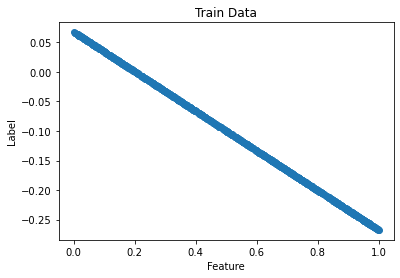

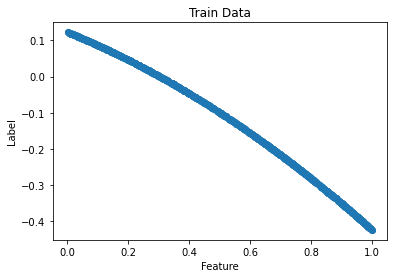

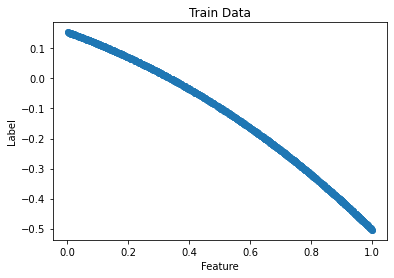

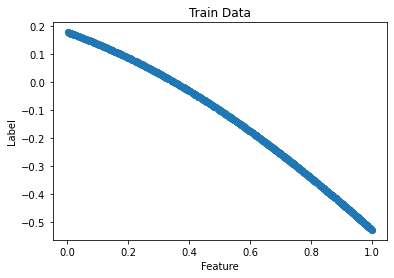

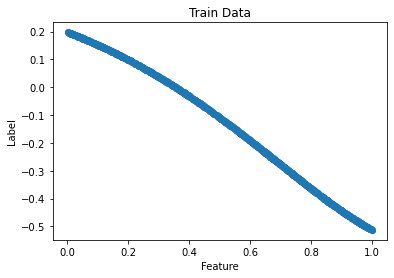

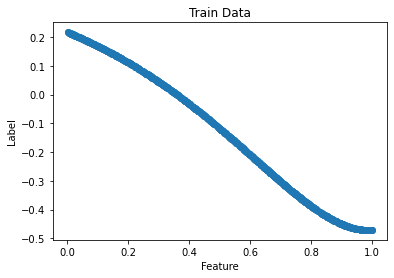

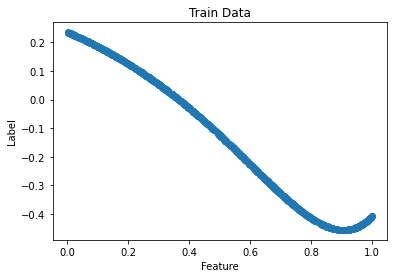

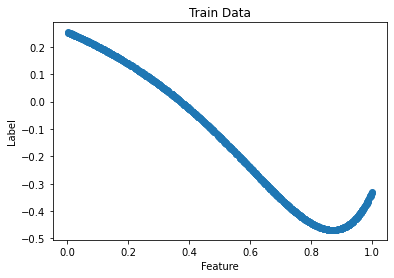

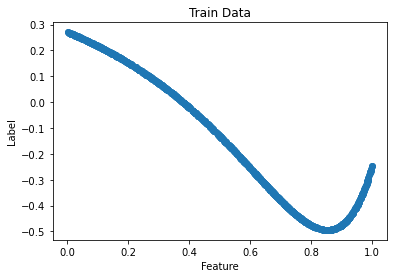

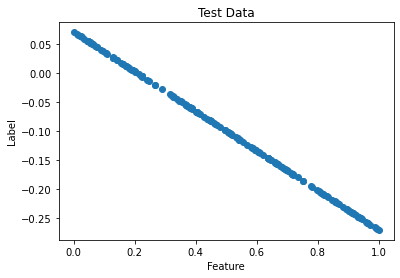

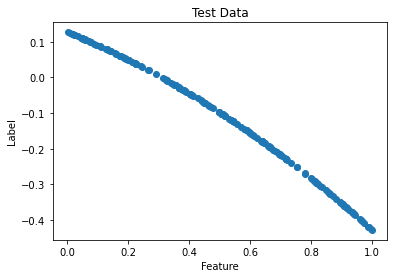

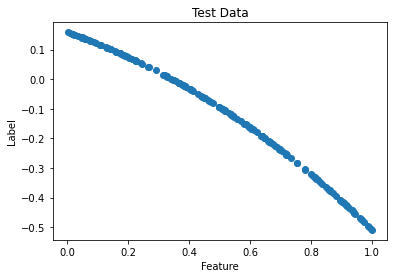

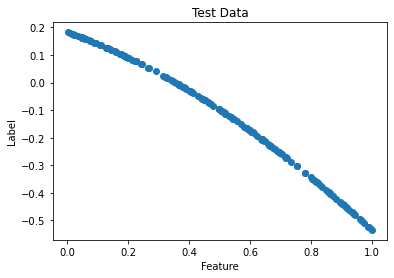

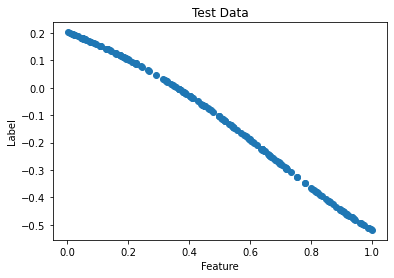

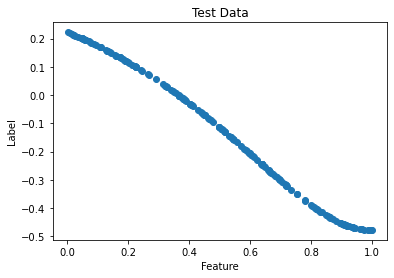

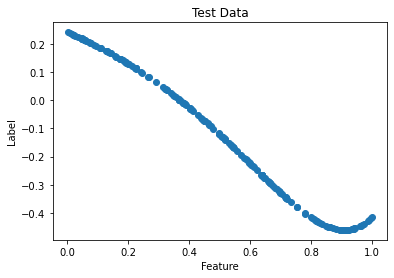

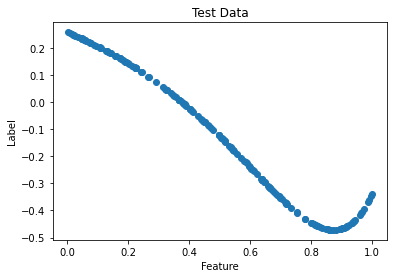

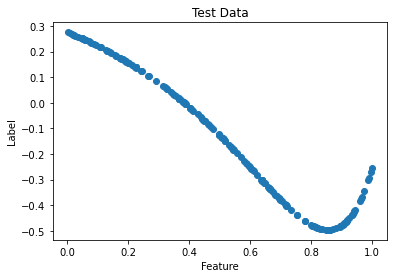

In [18]:
print("Training")
poly_wR,all_hr,train_errRi=trainRidge(x1,y1)
print("Testing")
all_hrTest,testr_err=testRidge(x2,y2,poly_wR)
plotcurves(x1,all_hr,'Train Data')
plotcurves(x2,all_hrTest,'Test Data')